# Linear Regression

Dataset: [Boston House Prices](https://www.kaggle.com/datasets/vikrishnan/boston-house-prices) | [CSV](/datasets/boston.xls)

Video: [Stanford CS229: Machine Learning - Linear Regression and Gradient Descent](https://www.youtube.com/watch?v=4b4MUYve_U8&list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU&index=2)

In [12]:
import typing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
def least_mean_squares(
    params: np.ndarray,
    X_train: np.ndarray,
    y_train: np.ndarray,
    hypothesis_func: typing.Callable[[np.ndarray, np.ndarray], np.floating],
    *,
    learning_rate: float = 0.001,
) -> np.ndarray:
    """
    Implements Gradient Descent using the Least Mean Squares cost function.
    (Widrow-Hoff learning rule).
    """

    prev = params.copy()
    converged = False

    while not converged:
        # Update rule per feature parameter

        # for j, param in enumerate(params):
        #     params[j] = param + (learning_rate * (sum(
        #         ((y_train[i] - hypothesis_func(params, X_train[i])) * (1 if j==0 else X_train[i][j-1])) for i in range(len(X_train))
        #     )))

        
        # Vector form
        params = params + (learning_rate * (sum(
            ((y_train[i] - hypothesis_func(params, X_train[i])) * (np.insert(X_train[i].copy(), 0, 1))) for i in range(len(X_train))
        )))

        if np.array_equal(prev, params):
            converged = True
            break
        else:
            prev = params.copy()

    return params

In [17]:
class LinearRegression:
    def __init__(self):
        self.params = np.array([]) # intentional: empty

    def _predict(self, params: np.ndarray, X: np.ndarray) -> np.floating:
        return params[0] + sum(
            (X[i] * params[i+1]) for i in range(len(X))
        )
    
    def predict(self, X: np.ndarray):
        return self._predict(self.params, X)

    def fit(
        self,
        X_train: np.ndarray,
        y_train: np.ndarray
    ):
        initial = np.zeros(len(X_train[0]) + 1)
        self.params = least_mean_squares(
            initial,
            X_train,
            y_train,
            self._predict
        )


In [8]:
df = pd.read_csv("../datasets/boston.xls")
X, y = df[["NOX"]].to_numpy(), df[["MEDV"]].to_numpy()

In [18]:
model = LinearRegression()
model.fit(X, y)

[11.4016      6.09442791]
[15.32343258  7.99853974]
[16.72637995  8.49252669]
[17.28078582  8.51248216]
[17.54906131  8.3735872 ]
[17.72057384  8.18196015]
[17.85908608  7.97332742]
[17.98606927  7.7597143 ]
[18.10875498  7.5451659 ]
[18.22958024  7.33104036]
[18.34936775  7.11779116]
[18.46839665  6.9055672 ]
[18.58676304  6.69441482]
[18.70450138  6.48434588]
[18.82162536  6.27536064]
[18.93814169  6.06745545]
[19.05405469  5.86062539]
[19.16936788  5.65486513]
[19.28408451  5.4501692 ]
[19.39820769  5.24653213]
[19.51174052  5.04394845]
[19.62468606  4.84241271]
[19.73704733  4.64191949]
[19.84882738  4.4424634 ]
[19.9600292   4.24403907]
[20.07065579  4.04664117]
[20.18071012  3.85026439]
[20.29019514  3.65490344]
[20.39911382  3.46055308]
[20.50746907  3.26720806]
[20.61526381  3.0748632 ]
[20.72250094  2.88351332]
[20.82918335  2.69315326]
[20.9353139   2.50377792]
[21.04089544  2.3153822 ]
[21.14593083  2.12796103]
[21.25042288  1.94150936]
[21.3543744   1.75602219]
[21.4577882 

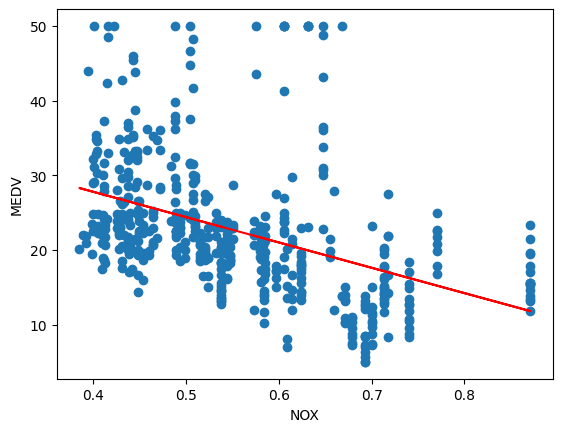

In [14]:
y_pred = [model.predict(row) for row in X]

plt.scatter(X, y)
plt.plot(X, y_pred, color="red")

plt.xlabel("NOX")
plt.ylabel("MEDV")

plt.show()